# Table of contents

0. Introduction
   
1. Autoencoder training | ln[1] ~ ln[7]
   
2. Image representation by Autoencoder | ln[8] ~ ln[9]
   
3. Image encoding by Encoder | ln[10] ~

# 0. Introduction

2024.10.02  
딥러닝 응용 수업 Autoencoder 발표용으로 만든 notebook.

**Purpose**
- Autoencoder를 통해서 image를 representation하는 과정을 확인한다.
- Autoencoder 훈련 후 encoder 부분만 분리하여 image를 encoding(압축)하는 과정을 확인한다.

# 1. Autoencoder training

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalization
X_train = X_train.astype('float32') / 255.0 # 각 pixel이 0~255 값 -> 0~1 값
X_test = X_test.astype('float32') / 255.0
# Color Channel 추가. 흑백이면 1, 컬러면 3
X_train = X_train.reshape((-1, 28, 28, 1)) # (60000, 28, 28) -> (60000, 28, 28, 1)
X_test = X_test.reshape((-1, 28, 28, 1))

y_train_hot = keras.utils.to_categorical(y_train)
y_test_hot = keras.utils.to_categorical(y_test)

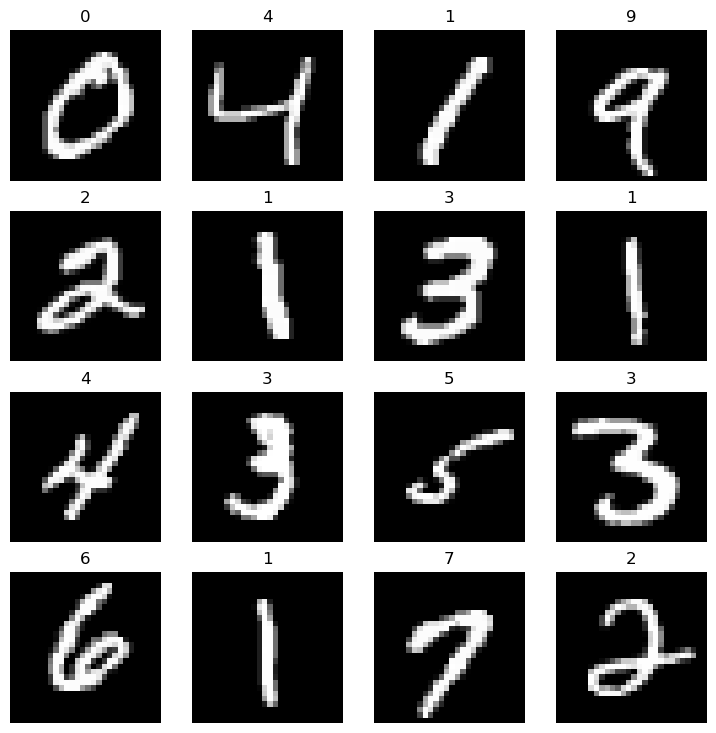

In [4]:
# dataset samples 확인
figure = plt.figure(figsize=(9, 9))
cols, rows = 4, 4

# train dataset visualize
for i in range(1, cols * rows + 1):
    img, label = X_train[i], y_train[i]
    figure.add_subplot(rows, cols, i) # 각 sample을 subplot으로 추가
                                      # 1개의 큰 mainplot 안에 4*4개의 subplot
    plt.title(label) # 각 subplot에 적용됨
    plt.axis('off') # 축 범위 표시 off
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [5]:
input_shape = X_train.shape[1:] # (28, 28, 1)
encoding_dim = 64

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=input_shape))
# Encoder
model.add(keras.layers.Dense(units=256,
                             activation='relu'))
model.add(keras.layers.Dense(units=encoding_dim, # Latent Space
                             activation='relu'))
# Decoder
model.add(keras.layers.Dense(units=input_shape[0] * input_shape[1], activation='relu'))
model.add(keras.layers.Reshape(input_shape))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 268,368
Trainable params: 268,368
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='mean_squared_error')

history = model.fit(X_train, X_train,
                    validation_split=0.1,
                    batch_size=512,
                    epochs=20,
                    verbose=2)

Epoch 1/20
106/106 - 1s - loss: 0.0464 - val_loss: 0.0232 - 1s/epoch - 12ms/step
Epoch 2/20
106/106 - 0s - loss: 0.0187 - val_loss: 0.0158 - 297ms/epoch - 3ms/step
Epoch 3/20
106/106 - 0s - loss: 0.0145 - val_loss: 0.0135 - 307ms/epoch - 3ms/step
Epoch 4/20
106/106 - 0s - loss: 0.0129 - val_loss: 0.0123 - 313ms/epoch - 3ms/step
Epoch 5/20
106/106 - 0s - loss: 0.0119 - val_loss: 0.0116 - 308ms/epoch - 3ms/step
Epoch 6/20
106/106 - 0s - loss: 0.0112 - val_loss: 0.0110 - 302ms/epoch - 3ms/step
Epoch 7/20
106/106 - 0s - loss: 0.0107 - val_loss: 0.0106 - 314ms/epoch - 3ms/step
Epoch 8/20
106/106 - 0s - loss: 0.0103 - val_loss: 0.0102 - 310ms/epoch - 3ms/step
Epoch 9/20
106/106 - 0s - loss: 0.0100 - val_loss: 0.0100 - 317ms/epoch - 3ms/step
Epoch 10/20
106/106 - 0s - loss: 0.0097 - val_loss: 0.0097 - 322ms/epoch - 3ms/step
Epoch 11/20
106/106 - 0s - loss: 0.0095 - val_loss: 0.0095 - 309ms/epoch - 3ms/step
Epoch 12/20
106/106 - 0s - loss: 0.0093 - val_loss: 0.0094 - 306ms/epoch - 3ms/step
Epo

# 2. Image representation

In [8]:
X_represented = model.predict(X_train)

1875/1875 [==============================] - 2s 816us/step


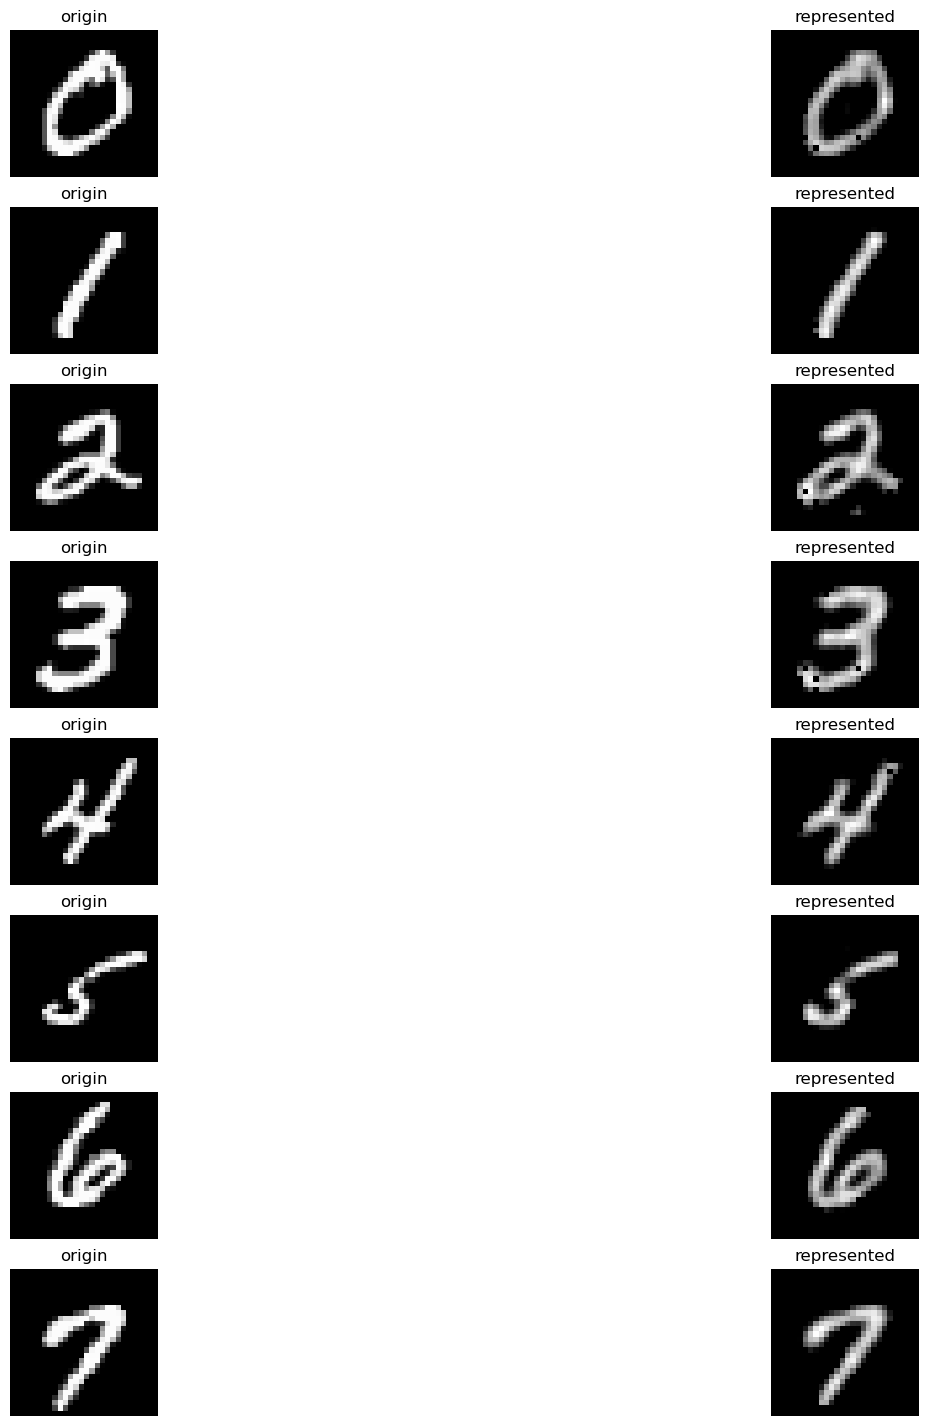

In [9]:
# origin image와 represented image 확인
figure = plt.figure(figsize=(18, 18))
cols, rows = 2, 8

# image visualize
for i in range(1, cols * rows + 1):
    # origin image
    if (i % 2 == 1):
        img1 = X_train[i]
        figure.add_subplot(rows, cols, i)
        plt.title('origin')
        plt.axis('off')
        plt.imshow(img1.squeeze(), cmap='gray')
    # represented image
    elif (i % 2 == 0):
        img2 = X_represented[i-1]
        figure.add_subplot(rows, cols, i)
        plt.title('represented')
        plt.axis('off')
        plt.imshow(img2.squeeze(), cmap='gray')
plt.show()

# 3. Image encoding by Encoder

In [10]:
# Save the Autoencoder model
base_loss = model.evaluate(X_test, X_test)
autoencoder_file = './autoencoder_model.h5'
tf.keras.models.save_model(model, autoencoder_file, include_optimizer=False)

print('model saved at ', autoencoder_file)
print('Base Loss >{:.2f}'.format(base_loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.0083
model saved at  ./autoencoder_model.h5
Base Loss >0.01


In [11]:
# Load the pre-trained autoencoder model
from tensorflow.keras.models import load_model

autoencoder = load_model(autoencoder_file)
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 268,368
Trainable params: 268,368
Non-trainable params: 0
_________________________________________________________________


In [12]:
# encoder 부분만 분리
encoder = tf.keras.models.clone_model(autoencoder)
encoder.pop()
encoder.pop()
# Latent space를 이미지로 변환하는 레이어 추가
encoder.add(keras.layers.Reshape((int(encoding_dim**(1/2)), int(encoding_dim**(1/2))))) # 64 -> (8, 8)
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 reshape_1 (Reshape)         (None, 8, 8)              0         
                                                                 
Total params: 217,408
Trainable params: 217,408
Non-trainable params: 0
_________________________________________________________________


In [13]:
# image encoding(압축)
X_encoded = encoder.predict(X_train)

1875/1875 [==============================] - 1s 771us/step


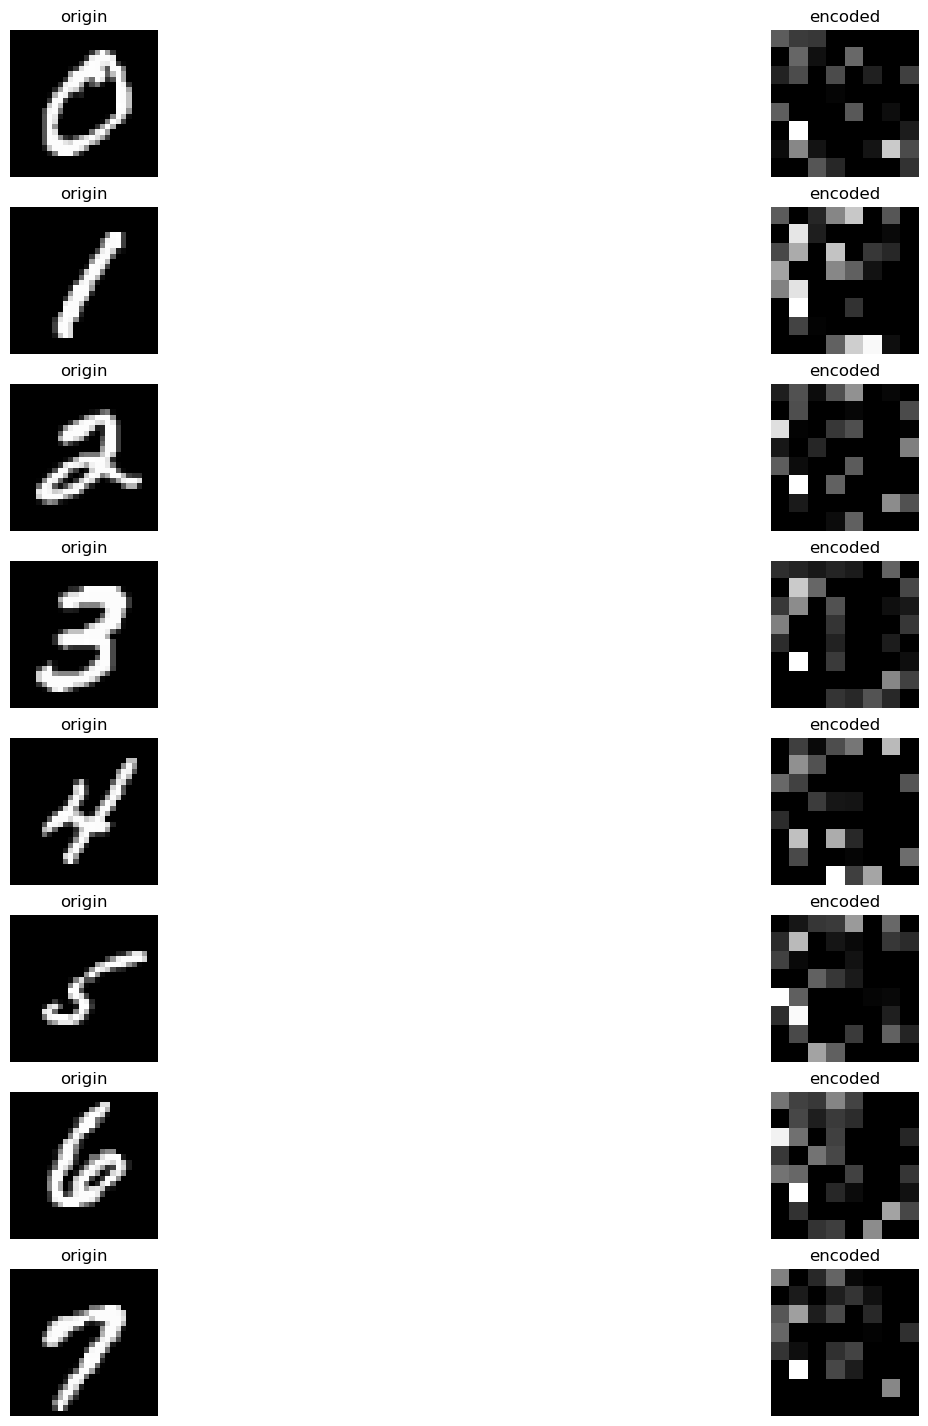

In [14]:
# origin image와 encoded image 확인
figure = plt.figure(figsize=(18, 18))
cols, rows = 2, 8

# image visualize
for i in range(1, cols * rows + 1):
    # origin image
    if (i % 2 == 1):
        img1 = X_train[i]
        figure.add_subplot(rows, cols, i)
        plt.title('origin')
        plt.axis('off')
        plt.imshow(img1.squeeze(), cmap='gray')
    # represented image
    elif (i % 2 == 0):
        img2 = X_encoded[i-1]
        figure.add_subplot(rows, cols, i)
        plt.title('encoded')
        plt.axis('off')
        plt.imshow(img2.squeeze(), cmap='gray')
plt.show()